> # Chapter 14. Why the Mean Matters
---




### 1.  Properties of the Mean 


### 2.  Variability 


### 3.  The SD and the Normal Curve 


### 4.  The Central Limit Theorem 


### 5.  The Variability of the Sample Mean 


### 6.  Choosing a Sample Size 




In [1]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


+ 평균은 다른 통계값보다 좋은 장점을 가지고 있다.
 - 샘플 평균은 모집단 분포에 상관없이 종모양에 가깝다.
+ 이 장에서는 다음 질문에 답하고자 한다.
 - What exactly does the mean measure?
 - How close to the mean are most of the data?
 - How is the sample size related to the variability of the sample mean?
 - Why do empirical distributions of random sample means come out bell shaped?
 - How can we use sample means effectively for inference?


> ### Properties of the Mean
---
+ Definition
 - average (or mean) : 수집합 내 원소들의 합을 원소들의 개수로 나눈 값
 - mean() or average() 함수 이용
+ Mean은 smoother 역할을 수행한다.

In [2]:
not_symmetric = make_array(2, 3, 3, 9)
np.average(not_symmetric)


4.25

In [3]:
np.mean(not_symmetric)

4.25

> True/False 집합에서 비중(Proportion)은 곧 평균값(Mean)이 된다.

In [4]:
zero_one = make_array(1, 1, 1, 0)
np.mean(zero_one)


0.75

> The Mean and the Histogram

+ 두 수집합의 분포가 같다면 평균도 같다.

In [5]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

+ 평균값은 분포의 무게 중심이다.

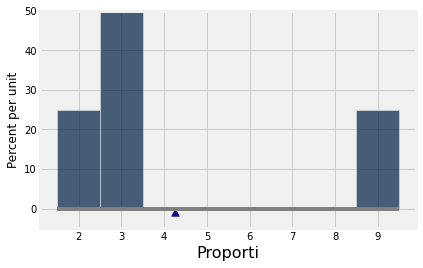

In [6]:
t = Table().with_columns(
    'Value', make_array(2, 3, 9),
    'Proportion', make_array(0.25, 0.5, 0.25)
)

mean = sum(t.column('Value')*t.column('Proportion'))
t.hist(bin_column='Value', bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5);

> The Mean and the Median
---
+ 분포가 대칭이라면 평균과 중간값은 같다.
+ skew 분포(한 쪽으로 긴 꼬리)라면 평균은 중간값으로부터 skew된 방향으로 움직인다.

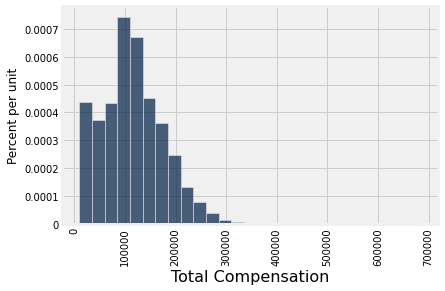

In [7]:
sf2015 = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/san_francisco_2015.csv').where('Salaries', are.above(10000))
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))

In [8]:
percentile(50, sf2015.column('Total Compensation'))

110305.79

In [9]:
np.mean(sf2015.column('Total Compensation'))

114725.98411824222

+ 이런 이유로 경제분야 분석에서는 중간값을 더 자주 사용한다.

> ### Variability
---
+ 수집합 내 값들이 평균으로부터 얼마나 떨어져 있는가도 중요하다.
+ deviations from the average

In [10]:
any_numbers = make_array(1, 2, 2, 10)
mean = np.mean(any_numbers)
deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


+ Sum of the deviations from average is zero.

In [11]:
squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps


Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [12]:
variance = np.mean(squared_deviations)
variance

13.1875

위 값을 Variance(분산) 라고 부른다.


이것은 제곱평균이므로 원래값과 같은 스케일로 바꿔줄 수 있다.

In [13]:
sd = variance ** 0.5
sd

3.6314597615834874

Standard Deviation (SD; 표준편차)

+ root mean square of deviations from average

In [14]:
np.std(any_numbers)

3.6314597615834874

In [15]:
nba13 = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


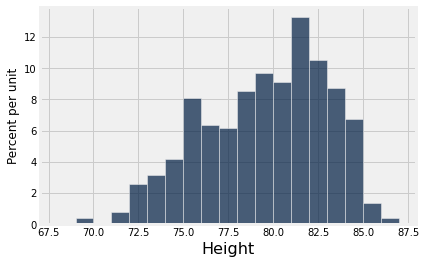

In [16]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))


In [17]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

In [18]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

최대값과 최소값이 평균값으로부터 SD기준으로 얼마나 떨어져 있는가?

In [19]:
nba13.sort('Height', descending=True).take(0)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26


In [20]:
(87 - mean_height)/sd_height

2.2995015194397923

In [21]:
nba13.sort('Height').take(0)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24


In [22]:
(69 - mean_height)/sd_height

-2.9169868288775844

평균값으로부터 3SD 이내로 떨어져 있다.


나이에 대해서도 조사해 보자.

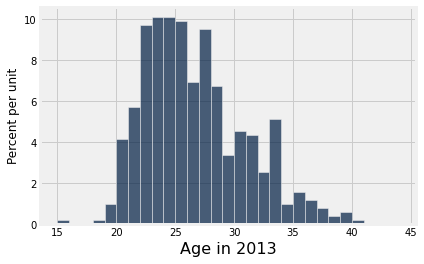

In [23]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))


In [24]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

In [25]:
nba13.sort('Age in 2013', descending=True).take(0)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40


In [26]:
(40 - mean_age)/sd_age

3.1958482778922357

In [27]:
nba13.sort('Age in 2013').take(0)

Name,Position,Height,Weight,Age in 2013
Jarvis Varnado,Forward,81,230,15


In [28]:
(15 - mean_age)/sd_age

-2.589581103867081

나이도 3SD 까지 차이가 난다.

> Chebychev’s Bounds
---
For all lists and all numbers $z$, the proportion of entries that are in the range “average $\pm z \cdot$ SD” is at least $1 - \frac{1}{z^2}$.


+ Standard units
 - $z$

In [0]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    


> Example

In [30]:
united = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [31]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows


0.9790235081374322

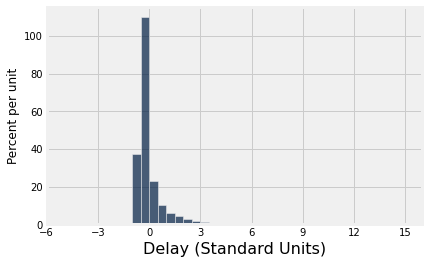

In [32]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));


> ### The SD and the Normal Curve
---
+ Bell-shape 분포에서는 SD가 쉽게 파악된다.

In [0]:
baby = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/baby.csv')
heights = baby.column('Maternal Height')


In [34]:
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [35]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

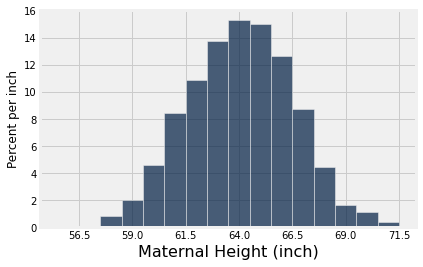

In [36]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

__The standard normal curve__
> $ \phi(z) = \frac{1}{ \sqrt {2\pi} } e^{-\frac{1}{2}z^2}   (-\infty < z < \infty) $

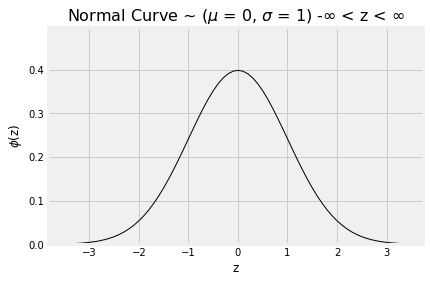

In [37]:
plot_normal_cdf()


+ 성질
 - 전체 면적은 1
 - 0을 기준으로 대칭, 평균=0, SD=1, 중간값=0
 - 변곡점은 -1, +1
 

+ cdf : cumulative distribution function
+ 아래 모듈을 사용

In [0]:
from scipy import stats

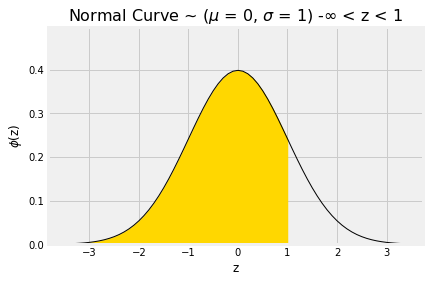

In [39]:
plot_normal_cdf(1)

In [40]:
stats.norm.cdf(1)

0.8413447460685429

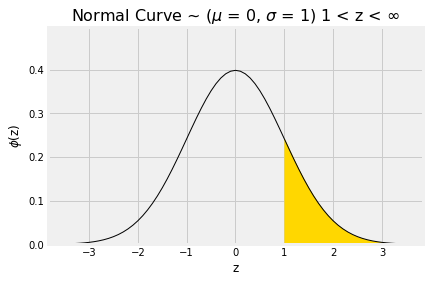

In [41]:
plot_normal_cdf(lbound=1)

In [42]:
1 - stats.norm.cdf(1)

0.15865525393145707

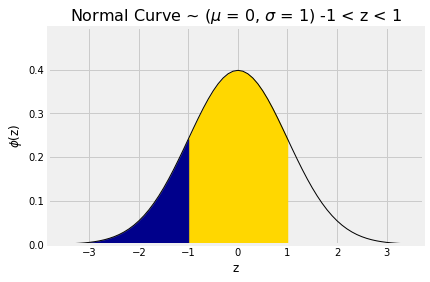

In [43]:
plot_normal_cdf(1, lbound=-1)

In [44]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [45]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [46]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

> ### The Central Limit Theorem
---
그러나 많은 변수의 분포가 정규분포가 아니다.

__Net Gain in Roulette__

In [47]:
colors = make_array('green', 'green')
for i in np.arange(18):
    colors = np.append(colors, ['red', 'black'])
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)
wheel


38


Pocket,Color
0,green
00,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [48]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


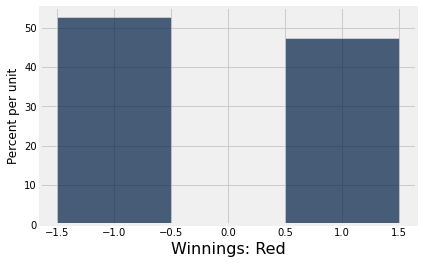

In [49]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

+ 400번 베팅하여 얻거나 잃게 될 금액을 조사한다. 그리고 이 시행을 10000번 반복하자.

In [0]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

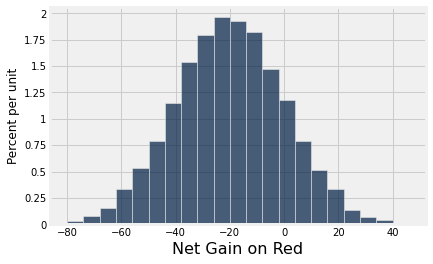

In [51]:
results.hist(bins=np.arange(-80, 50, 6))

+ 한 번 베팅할 때 상금/손실의 분포는 bell-shape이 아니었지만
+ 400번 베팅시 분포는 bell-shape으로 바뀌었다.

__Center__

+ 이론적 vs Empirical

In [52]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
400 * average_per_bet

-21.052631578947366

In [53]:
np.mean(results.column(0))

-21.0574

__Spread__

+ 관찰
 - 변곡점이 대략 0일때이므로 20정도로 관찰된다.
+ Empirical

In [54]:
np.std(results.column(0))

20.07750744589577

또 다른 예를 살펴보자.


Average Flight Delay

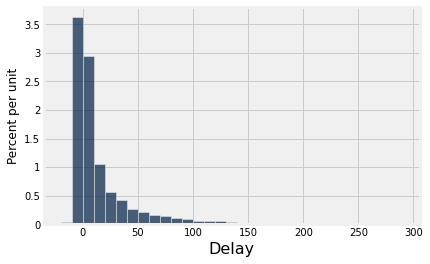

In [55]:
united = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/united_summer2015.csv')
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [56]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

+ 400개 샘플링을 하여 평균을 측정해 보자.
+ 이를 10000번 반복 시행하자.

In [0]:
delay = united.select('Delay')

sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)


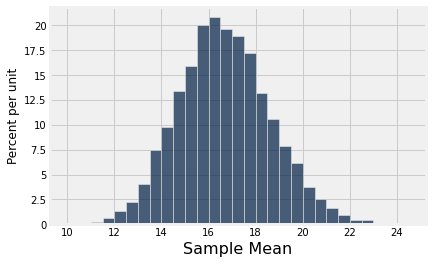

In [58]:
results.hist(bins=np.arange(10, 25, 0.5))

+ 역시 1회 delay 변수는 right-skewed 분포였지만
+ 400번 평균 delay 변수는 bell-shaped 분포이다.

__Central Limit Theorem (중심극한정리)__

The probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn


+ 샘플 크기의 영향을 알아 보자.
+ 멘델의 실험에서 200그루 콩나무를 심었을 때 자주색꽃의 비율을 조사해 보자.

In [0]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')
model = Table().with_column('Color', colors)

props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)


+ 이번에는 200그루 대신 800그루로 바꾸어 보자.

In [0]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

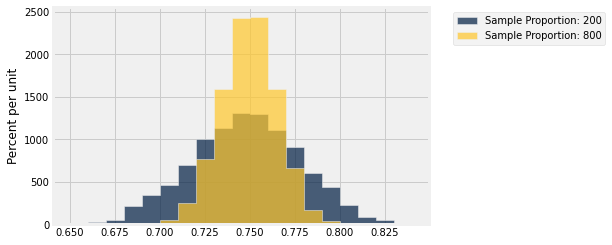

In [61]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

+ 샘플 개수와 관계없이
 - 평균은 변화가 거의 없다
 - _unbiased estimate_ 
+ 샘플 개수가 커질수록
 - SD가 작아진다. 

> ### The Variability of the Sample Mean
---
그러면 샘플 개수와 SD의 관계에 대해 살펴보자.

In [0]:
united = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/united_summer2015.csv')
delay = united.select('Delay')


In [64]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

In [0]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))


+ 샘플 크기가 100개, 400개, 625개인 경우를 비교해 보자.

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.635407
Population SD: 39.480199851609314
SD of sample means: 3.9433331072014446


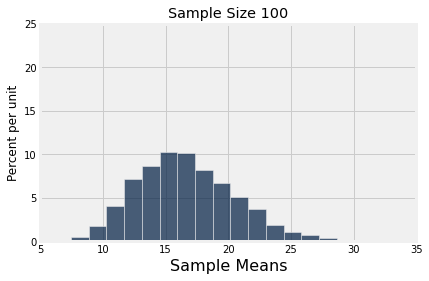

In [66]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);


Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.63408025
Population SD: 39.480199851609314
SD of sample means: 1.9658355617739083


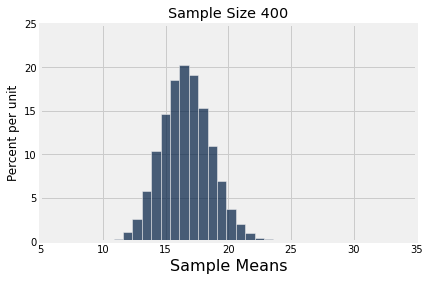

In [67]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.68404064
Population SD: 39.480199851609314
SD of sample means: 1.5828656784997235


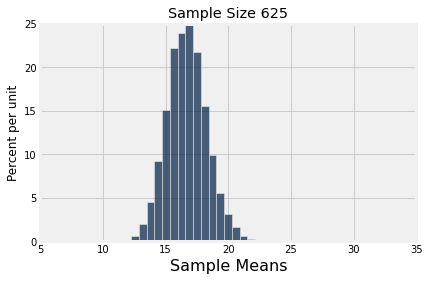

In [68]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);


+ SD 변화에 주목하자.
 - 100개 샘플의 SD는 전체 SD의 약 1/10
 - 400개 샘플의 SD는 전체 SD의 약 1/20
 - 625개 샘플의 SD는 전체 SD의 약 1/25 

+ 이러한 관계를 조금 더 자세하게 계산해보자.

In [0]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)
pop_sd = np.std(delay.column('Delay'))
sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)


In [70]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
25,7.94495,7.89604
50,5.6425,5.58334
75,4.6145,4.55878
100,3.96305,3.94802
125,3.54764,3.53122
150,3.2167,3.22354
175,3.00127,2.98442
200,2.80292,2.79167
225,2.61168,2.63201
250,2.50997,2.49695


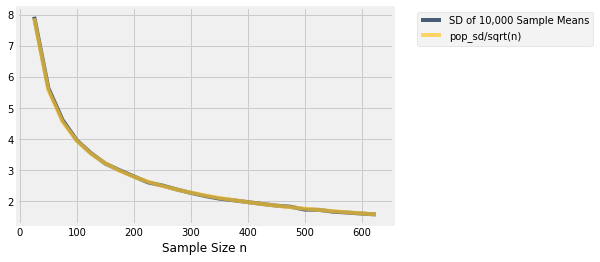

In [71]:
sd_comparison.plot('Sample Size n')

__The Square Root Law__


+ 개수가 n인 샘플 평균의 SD는 $\frac{1}{\sqrt{n}}$으로 감소한다.
+ 다시 말해 SD의 정확도를 $k$배 높이고 싶다면 샘플 개수를 $k^2$으로 증가시켜야 한다.

> ### Recap
---

+ 평균값
 - np.average() 혹은 np.mean() 사용
 - Mean vs Median in skewed distribution.
+ 분산
 - variance vs. standard deviation
 - np.std()
 - Chebychev’s Bounds
+ 정규 곡선에서 누적밀도함수 구하기
 - cdf : scipy.stats.cdf() 
+ The Central Limit Theorem
 - 샘플의 평균의 분포는 샘플 모집단 분포에 관계없이 정규분포에 가까워진다.
+ 샘플 평균의 분산 
 - The Square Root Law